In [16]:
from sas7bdat import SAS7BDAT
import numpy as np
import pandas as pd

In [17]:
reader = SAS7BDAT('doj_pdmpqtr3_2020.sas7bdat')

In [18]:
df = reader.to_data_frame()

In [19]:
df

,dispensary_state,patient_state,patient_county_name,patient_gender,drug_name,drug_sequence,authorized_refill_count,refill_number,compound_drug,quantity,...,veterinarian_prescription,filled_at,dispensary_postal_code3,New_Prescriber_ID_DEA,New_Dispensary_ID_DEA,New_Consolidation_ID,New_animal_name,New_patient_birth_month,New_patient_birth_year,New_patient_postal_code5
0,AR,AR,Jefferson,female,CARISOPRODOL 350 MG TABLET,,5.0,2.0,f,60.000,...,f,2020-07-01,716,543075573.0,370997869.0,4.911774e+09,NO,9.0,1954.0,71601
1,AR,AR,Jefferson,female,PHENTERMINE 30 MG CAPSULE,,2.0,1.0,f,30.000,...,f,2020-07-01,716,333024804.0,493432493.0,1.261807e+09,NO,4.0,1968.0,71601
2,AR,AR,,female,OXYCODONE-ACETAMINOPHEN 10-325,,0.0,0.0,f,90.000,...,f,2020-07-01,716,293518980.0,280119634.0,3.144114e+09,NO,6.0,1958.0,71601
3,AR,AR,Jefferson,female,ALPRAZOLAM 1 MG TABLET,,2.0,2.0,f,90.000,...,f,2020-07-01,716,226877774.0,460511872.0,6.078523e+09,NO,6.0,1950.0,71601
4,AR,AR,Jefferson,female,CARISOPRODOL 350 MG TABLET,,5.0,4.0,f,90.000,...,f,2020-07-01,716,543075573.0,599017862.0,6.013272e+09,NO,3.0,1952.0,71601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535016,AR,AR,Crawford,female,PHENTERMINE HCL POWDER,1,0.0,0.0,t,0.255,...,f,2020-09-30,727,219170673.0,360767651.0,5.239064e+09,NO,7.0,1963.0,72959
1535017,AR,AR,Washington,female,TRAMADOL HCL 50 MG TABLET,,0.0,0.0,f,45.000,...,f,2020-09-30,727,295995880.0,121562830.0,9.836756e+09,NO,4.0,1934.0,72959
1535018,AR,AR,Washington,male,"TESTOSTERON CYP 2,000 MG/10 ML",,1.0,0.0,f,10.000,...,f,2020-09-30,727,151617700.0,121562830.0,7.592678e+09,NO,7.0,1982.0,72959
1535019,AR,AR,Washington,male,ALPRAZOLAM 0.25 MG TABLET,,5.0,1.0,f,30.000,...,,2020-09-30,728,556701213.0,490997523.0,3.102674e+09,NO,10.0,1955.0,72959


In [20]:
df.columns

Index(['dispensary_state', 'patient_state', 'patient_county_name',
       'patient_gender', 'drug_name', 'drug_sequence',
       'authorized_refill_count', 'refill_number', 'compound_drug', 'quantity',
       'days_supply', 'partial_fill', 'payment_type', 'product_id',
       'product_id_type', 'rx_norm_code', 'rx_norm_product_qualifier', 'units',
       'written_at', 'veterinarian_prescription', 'filled_at',
       'dispensary_postal_code3', 'New_Prescriber_ID_DEA',
       'New_Dispensary_ID_DEA', 'New_Consolidation_ID', 'New_animal_name',
       'New_patient_birth_month', 'New_patient_birth_year',
       'New_patient_postal_code5'],
      dtype='object')

In [21]:
unique_ndc = df.product_id.unique()

In [22]:
df.product_id_type.unique()

array(['NDC'], dtype=object)

In [23]:
ndc_df = pd.DataFrame(unique_ndc)

In [24]:
ndc_df.to_csv("unique_ndc.csv", header=False, index=False)

In [22]:
ndc_df

,0
0,69584011110
1,00185500001
2,00406052301
3,00781107901
4,58657064550
...,...
2977,51407051490
2978,00603254421
2979,00641234139
2980,00378312093


In [26]:
df['date'] = pd.to_datetime(df['written_at'], format='%Y-%m-%d', errors='coerce')
df['quarter'] = pd.PeriodIndex(df.date, freq='Q')

In [27]:
df['quarter'].unique()

<PeriodArray>
['2020Q2', '2020Q1', '2020Q3', '2019Q4', '2019Q3', '2019Q2', '2000Q2',
 '2010Q3']
Length: 8, dtype: period[Q-DEC]

In [30]:
df_counts = df.pivot_table(index=['quarter'],
                               columns=['patient_county_name'],
                               values=['written_at'], aggfunc='count')

<AxesSubplot:xlabel='quarter'>

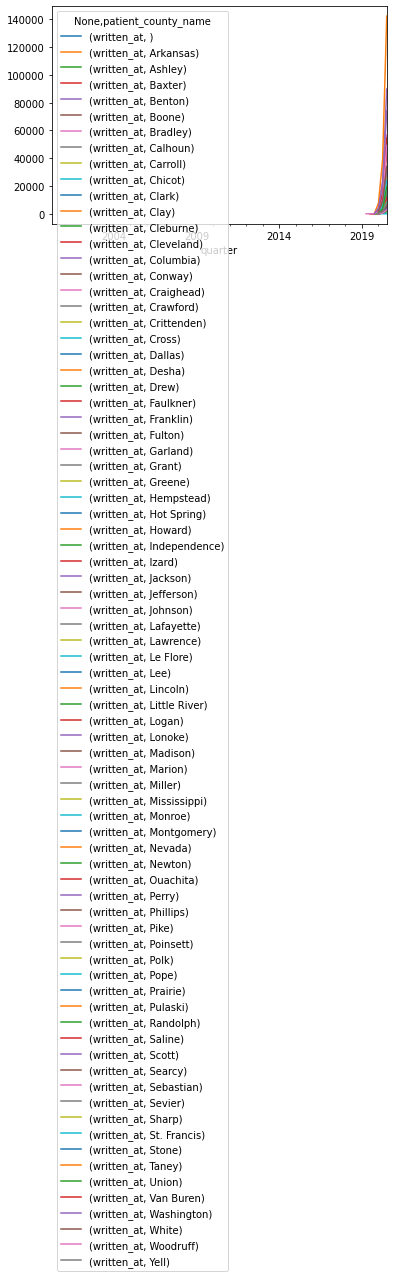

In [31]:
df_counts.plot()

In [11]:
df[5]

KeyError: 5

In [50]:
opioid_ndcs = pd.read_csv("ndcs_pdmp/opioid ndc codes.csv", dtype={'NDC': 'object'})

In [51]:
opioid_ndcs

,NDC,Medication_Name,Strength,Form,Route,DEA_Class,Simple_Generic_1,Pharm_Class_1,Thera_Class_1
0,00024033505,DEMEROL 50 MG TABLET,50 mg,Tablet,Oral,C-II,meperidine HCl,OPIOID ANALGESICS,ANALGESICS
1,00024033705,DEMEROL 100 MG TABLET,100 mg,Tablet,Oral,C-II,meperidine HCl,OPIOID ANALGESICS,ANALGESICS
2,00024195104,TALWIN NX 50 MG-0.5 MG TABLET,50-0.5 mg,Tablet,Oral,C-IV,pentazocine HCl/naloxone HCl,OPIOID ANALGESICS,ANALGESICS
3,00054023524,MORPHINE 15 MG TABLET,15 MG,Tablet,Oral,C-II,morphine sulfate,OPIOID ANALGESICS,ANALGESICS
4,00054023525,MORPHINE 15 MG TABLET,15 MG,Tablet,Oral,C-II,morphine sulfate,OPIOID ANALGESICS,ANALGESICS
...,...,...,...,...,...,...,...,...,...
1433,76045001110,DILAUDID (PF) 4 MG/ML INJECTION SYRINGE,4 mg/mL,Syringe,Injection,C-II,hydromorphone HCl/PF,OPIOID ANALGESICS,ANALGESICS
1434,76181000125,HYDROCODONE 7.5 MG-ACETAMINOPHEN 325 MG/15 ML ...,7.5-325 mg/15 mL,Solution,Oral,C-II,hydrocodone/acetaminophen,OPIOID ANALGESIC AND NON-SALICYLATE ANALGESICS,ANALGESICS
1435,76439013610,TRAMADOL 50 MG TABLET,50 mg,Tablet,Oral,C-IV,tramadol HCl,OPIOID ANALGESICS,ANALGESICS
1436,76439013611,TRAMADOL 50 MG TABLET,50 mg,Tablet,Oral,C-IV,tramadol HCl,OPIOID ANALGESICS,ANALGESICS


In [56]:
missing = []
found = []
ondc = opioid_ndcs['NDC'].to_numpy()
for row in ndc_df[0]:
    if row in ondc:
        found.append(row)
    else:
        missing.append(row)

In [57]:
len(missing)

2422

In [54]:
len(ndc_df)

2982

In [58]:
len(found)

560